In [1]:
#importing neccesary libraries
import pandas as pd
import numpy as np


In [50]:
#load the dataset
age = pd.read_csv('train.csv')

#view first 5 rows
age.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


Data Cleaning/Preparation

In [51]:
#view the shae of the data
age.shape

(20191, 10)

20191 rows and 10 columns

In [52]:
#checking the information about the data
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20191 entries, 0 to 20190
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20191 non-null  int64  
 1   Sex             20191 non-null  object 
 2   Length          20191 non-null  float64
 3   Diameter        20191 non-null  float64
 4   Height          20191 non-null  float64
 5   Weight          20191 non-null  float64
 6   Shucked Weight  20191 non-null  float64
 7   Viscera Weight  20191 non-null  float64
 8   Shell Weight    20191 non-null  float64
 9   Age             20191 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 1.5+ MB


We only have the Sex column to be categorical

In [53]:
#checking for missing values
age.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

We have no missing values

In [54]:
#checking for duplicates
age.duplicated().sum()

0

In [55]:
#checking the statistics
age.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000
mean,10095.000000,1.317672,1.024637,0.348064,23.400403,10.121481,5.061241,6.724716,9.953246
std,5828.783978,0.288066,0.237790,0.093185,12.717732,5.644895,2.801545,3.599905,3.170614
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,5047.500000,1.150000,0.887500,0.287500,13.437663,5.712424,2.849125,3.968930,8.000000
50%,10095.000000,1.375000,1.075000,0.362500,23.785231,9.908150,4.975337,6.803880,10.000000
75%,15142.500000,1.537500,1.200000,0.412500,32.318430,14.068439,7.002326,9.128539,11.000000
max,20190.000000,1.950000,1.612500,2.825000,78.797435,42.184056,19.589505,28.491248,29.000000


In [56]:
#checking outliers for the columns
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

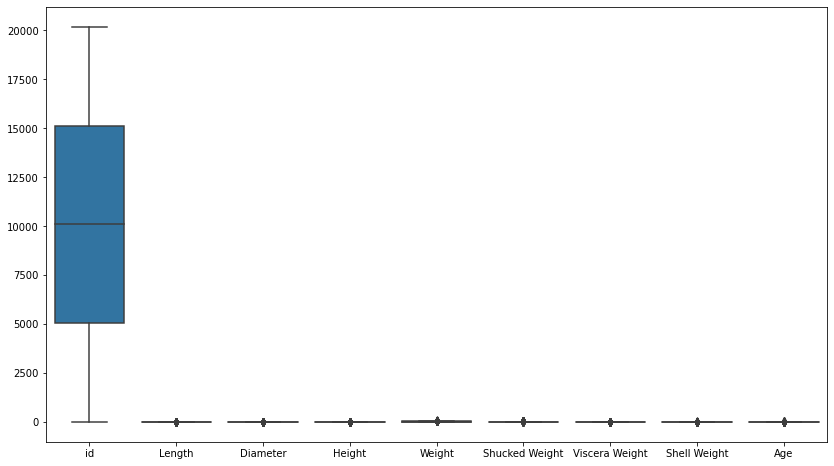

In [57]:
plt.figure(figsize=(14,8))
sns.boxplot(data = age)

Data Preprocessing

In [58]:
#import libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

In [59]:
encoder = LabelEncoder()
age['Sex'] = encoder.fit_transform(age['Sex'])

In [60]:
scaler = StandardScaler()

In [61]:
X = age.drop(['id','Age'], axis = 1)
y = age['Age']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [75]:
steps = [('scaler', StandardScaler()),
         ('model', KNeighborsClassifier())]

In [76]:
pipeline = Pipeline(steps)

In [77]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [78]:
pipeline.score(X_test, y_test)

0.2641743005694479

In [79]:
parameters = {'knn__n_neighbors':np.arange(1,50)}

In [80]:
cv = GridSearchCV(pipeline, param_grid=parameters)

In [81]:
cv.fit(X_train, y_train)

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


ValueError: Invalid parameter knn for estimator Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
cv